## DATASET: hopkins_forest.txt

### Analysis:
* interplay between a quantitative variable and a categorical variable
* compare histogram (i.e., density distribution) of a quantitative variable that can be categorized according to a categorical variable

### Technics:
* python pandas, pyplot, numpy and statistics
* write multi-lined long expression, by separating lines within parenthesis, brackets and braces
* understand built-in data structures including list, tuple and dictionary

### Suggested Exercises:
* dataset "flights_on_time_2016": generate histgram and boxplots; interpret data plots
* "load_factors_2016": problems 1, 2, 5, 6, 7 and 8
* "pizza_prices": problems 13 and 14


In [1]:
%pwd

'C:\\Users\\sc522\\PROJECTS\\STAT\\IS5\\code\\ch04'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat

In [3]:
datafile = '../../dataset/ch04/hopkins_forest.txt'
hopkins_forest = pd.read_csv(datafile, sep='\t')

In [4]:
hopkins_forest.head()  # certain columns are omitted as ellipsis

,Date,Year,Month,Day,Day of Year,Avg Temp (C),Max Temp (C),Min Temp (C),Avg Temp (F),Max Temp (F),...,Max Wind (mph),Min Wind (mph),Avg Barom (mb),Max Barom (mb),Min Barom (mb),Precip (in),Deep Well (ft),Shallow Well (ft),80 cm Soil (C),10 cm Soil (C)
0,01/01/2011 12:00 AM,2011,1,1,1,5.21,10.57,1.59,41.38,51.03,...,8.55,0,1011.47,1014,1008,0.00,5.23,1.60,5.17,2.74
1,01/02/2011 12:00 AM,2011,1,2,2,2.53,6.22,-2.96,36.55,43.20,...,27.40,0,1008.17,1010,1007,0.07,5.20,1.18,5.20,2.67
2,01/03/2011 12:00 AM,2011,1,3,3,-4.17,-1.63,-5.59,24.50,29.07,...,26.74,0,1011.17,1013,1008,0.00,4.89,1.36,5.14,2.64
3,01/04/2011 12:00 AM,2011,1,4,4,-3.97,1.79,-8.63,24.85,35.22,...,11.84,0,1005.70,1012,1001,0.00,4.66,1.47,5.07,2.15
4,01/05/2011 12:00 AM,2011,1,5,5,-3.13,0.47,-6.92,26.37,32.85,...,26.08,0,1001.78,1003,1001,0.00,4.59,1.54,4.97,1.91


In [5]:
hopkins_forest.columns  # get the column variable names

Index(['Date', 'Year', 'Month', 'Day', 'Day of Year', 'Avg Temp (C)',
       'Max Temp (C)', 'Min Temp (C)', 'Avg Temp (F)', 'Max Temp (F)',
       'Min Temp (F)', 'Avg Rel Hum (%)', 'Max Rel Hum (%)', 'Min Rel Hum (%)',
       'Avg Sol Rad (w/m^2)', 'Max Sol Rad (w/m^2)', 'Min Sol Rad (w/m^2)',
       'Total Sol Rad (w/m^2)', 'Avg Wind (mph)', 'Max Wind (mph)',
       'Min Wind (mph)', 'Avg Barom (mb)', 'Max Barom (mb)', 'Min Barom (mb)',
       'Precip (in)', 'Deep Well (ft)', 'Shallow Well (ft)', '80 cm Soil (C)',
       '10 cm Soil (C)'],
      dtype='object')

In [6]:
len(hopkins_forest)  # of course, 365 days in year 2011

365

In [7]:
avg_wind = hopkins_forest['Avg Wind (mph)']

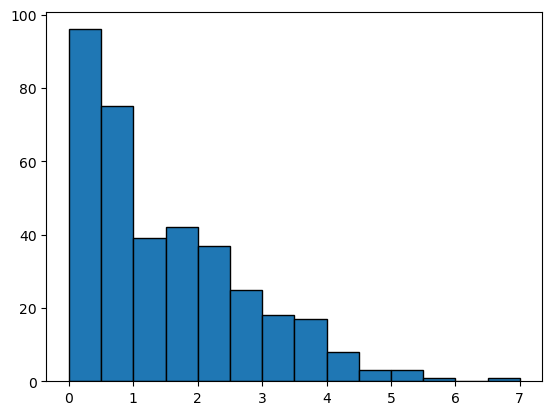

In [8]:
plt.hist(avg_wind, bins=np.linspace(0, 7, 15), edgecolor='k');

In [9]:
def iqr(data):
    q75, q25 = np.percentile(data, [75, 25])
    return q75, q25, q75-q25

In [10]:
print(f'Median of Average Daily Wind Speed is: {stat.median(avg_wind)} mph\n')
aw_q75, aw_q25, aw_iqr = iqr(avg_wind)
print(f'Q3 of Averge Daily Wind Speed is: {aw_q75} mph\n')
print(f'Q1 of Averge Daily Wind Speed is: {aw_q25} mph\n')
print(f'IQR of Averge Daily Wind Speed is: {aw_iqr:.2f} mph')

Median of Average Daily Wind Speed is: 1.12 mph

Q3 of Averge Daily Wind Speed is: 2.28 mph

Q1 of Averge Daily Wind Speed is: 0.46 mph

IQR of Averge Daily Wind Speed is: 1.82 mph


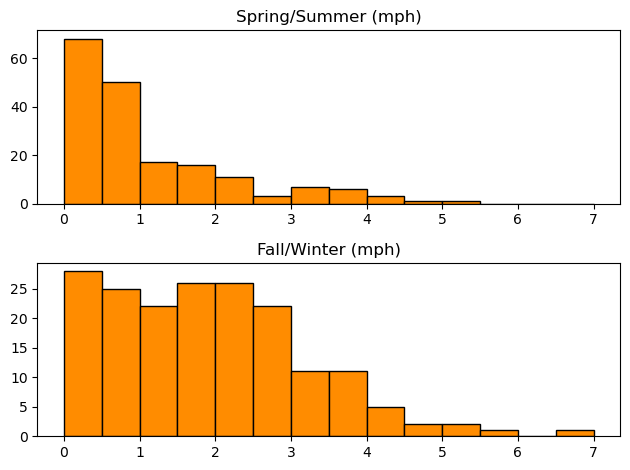

In [11]:
spring_summer_avg_wind = hopkins_forest[(hopkins_forest.Month>=4) & (hopkins_forest.Month<=9)]['Avg Wind (mph)']
fall_winter_avg_wind = hopkins_forest[(hopkins_forest.Month<4) | (hopkins_forest.Month>9)]['Avg Wind (mph)']
fig, axes = plt.subplots(2)
axes[0].hist(spring_summer_avg_wind, bins=np.linspace(0, 7, 15), color='darkorange', edgecolor='k');
axes[0].set_title('Spring/Summer (mph)', fontsize=12)
axes[1].hist(fall_winter_avg_wind, bins=np.linspace(0, 7, 15), color='darkorange', edgecolor='k');
axes[1].set_title('Fall/Winter (mph)', fontsize=12)
fig.tight_layout()

In [12]:
aw_q75, aw_q25, spring_summer_iqr = iqr(spring_summer_avg_wind)
aw_q75, aw_q25, fall_winter_iqr = iqr(fall_winter_avg_wind)
summary_avg_wind_by_season = pd.DataFrame(  # construct
    data={
          'Mean':   [round(stat.mean(spring_summer_avg_wind), 2), 
                     round(stat.mean(fall_winter_avg_wind), 2)
                    ],
          'StdDev': [round(stat.stdev(spring_summer_avg_wind), 2), 
                     round(stat.stdev(fall_winter_avg_wind), 2)
                    ],
          'Median': [round(stat.median(spring_summer_avg_wind), 2), 
                     round(stat.median(fall_winter_avg_wind), 2)
                    ],
          'IQR':    [round(spring_summer_iqr, 2), 
                     round(fall_winter_iqr, 2)
                    ]
         }, 
    index=['Spring/Summer', 'Fall/Winter']
)
summary_avg_wind_by_season  # display

,Mean,StdDev,Median,IQR
Spring/Summer,1.11,1.10,0.71,1.27
Fall/Winter,1.90,1.29,1.72,1.82


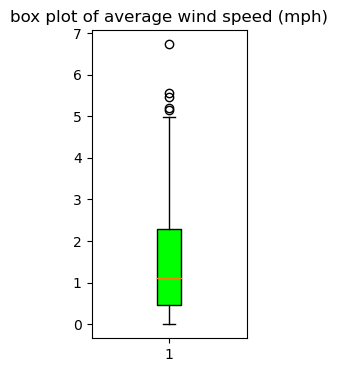

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(2,4))
p = axes.boxplot(avg_wind, patch_artist=True);
p['boxes'][0].set_facecolor('lime')
axes.title.set_text('box plot of average wind speed (mph)')

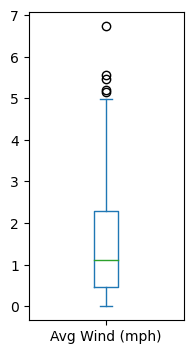

In [14]:
avg_wind.plot(kind='box', figsize=(2,4));

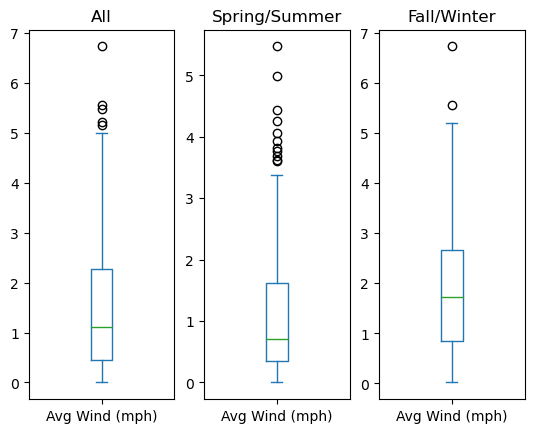

In [15]:
fig, axes = plt.subplots(1, 3);
avg_wind.plot(kind='box', ax=axes[0])
spring_summer_avg_wind.plot(kind='box', ax=axes[1])
fall_winter_avg_wind.plot(kind='box', ax=axes[2])
axes[0].title.set_text('All')
axes[1].title.set_text('Spring/Summer')
axes[2].title.set_text('Fall/Winter')

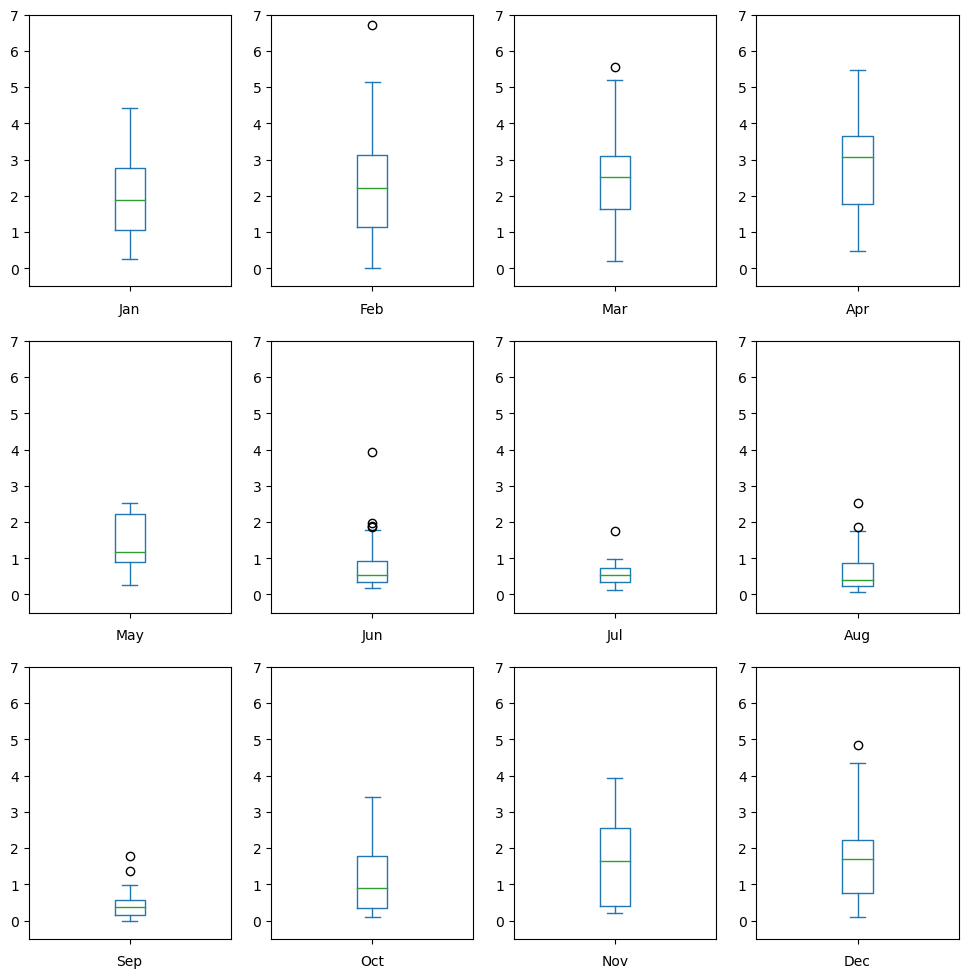

In [16]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, axes = plt.subplots(3, 4, figsize=(12, 12))
for i in range(12):
    p = hopkins_forest[hopkins_forest.Month==i+1]['Avg Wind (mph)'].plot(kind='box', ax=axes[i//4, i%4])
    p.set(ylim=[-0.5, 7])
    p.set(xticklabels=[])  
    p.set(xlabel=months[i])